# AI in Cyber Security network anomaly detection

Network anomaly detection

Dataset: https://www.kaggle.com/datasets/hassan06/nslkdd

KDDTrain+.TXT The full NSL-KDD train set including attack-type labels and difficulty level in CSV format

The full NSL-KDD train set including attack-type labels and difficulty level in CSV format

The attack types in the dataset are:
* normal
* neptune
* warezclient
* ipsweep
* portsweep
* teardrop
* nmap
* satan
* smurf
* pod
* back
* guess_passwd
* ftp_write
* multihop
* rootkit
* buffer_overflow
* imap
* warezmaster
* phf
* land
* loadmodule
* spy
* perl

# Data importing and preprocessing

In [ ]:
# importing required liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# importing dataset
train = pd.read_csv("KDDTrain+.txt")

# assigning data columns
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])
train.columns = columns
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
# removing the column level as it is irrelevent to anomaly detection
train = train.drop(columns='level')

In [ ]:
# exploring the types of attacks
train['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [ ]:
# assigning 0 to normal and 1 to malicious network
train["attack"] = train.attack.apply(lambda x: 0 if x == "normal" else 1)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1


# Splitting the Data

In [ ]:
# seperating the data into dependent and indipendent features
X = train.drop(columns="attack")
y = train["attack"]

In [ ]:
# creating one hot encoding of the non numeric columns
cols_to_ohe = train.select_dtypes("object").columns
ohe = OneHotEncoder(sparse_output=False)

# applying one hot encoding
num_cols = ohe.fit_transform(X[cols_to_ohe])

num_cols_names = ohe.get_feature_names_out(cols_to_ohe)

ohe_df = pd.DataFrame(num_cols, columns=num_cols_names)

X_ohe = pd.concat([X.drop(columns=cols_to_ohe), ohe_df], axis=1)

In [ ]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size=0.2, random_state=42)

# Data Scaling

In [ ]:
# scaling data using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression model

In [ ]:
# using logistic regression for classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# LR Model evaluation

In [ ]:
# analyzing the model
lr.score(X_test, y_test)

0.971978567176027

In [ ]:
# model analysis
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13386
           1       0.97      0.97      0.97     11809

    accuracy                           0.97     25195
   macro avg       0.97      0.97      0.97     25195
weighted avg       0.97      0.97      0.97     25195



# CNN model (Deep learning model)

In [ ]:
# checking training shapes
X_train.shape, y_train.shape

((100777, 122), (100777,))

In [ ]:
# checking test shapes
X_test.shape, y_test.shape

((25195, 122), (25195,))

In [ ]:
from keras.utils import to_categorical

# converting trainig and test sets into categorical values
X_train_cnn = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))

In [ ]:
# Compile and fit the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/10
1575/1575 [==============================] - 34s 21ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0303 - val_accuracy: 0.9936
Epoch 2/10
1575/1575 [==============================] - 40s 25ms/step - loss: 0.0177 - accuracy: 0.9948 - val_loss: 0.0203 - val_accuracy: 0.9944
Epoch 3/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0203 - val_accuracy: 0.9947
Epoch 4/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.0180 - val_accuracy: 0.9948
Epoch 5/10
1575/1575 [==============================] - 30s 19ms/step - loss: 0.0137 - accuracy: 0.9955 - val_loss: 0.0189 - val_accuracy: 0.9951
Epoch 6/10
1575/1575 [==============================] - 31s 20ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0190 - val_accuracy: 0.9959
Epoch 7/10
1575/1575 [==============================] - 31s 20ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0192 -

# CNN model evaluation

In [ ]:
# model evaluation
cnn_score = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print("\nDeep Learning Model: Convolutional Neural Network")
print("Test Loss:", cnn_score[0])
print("Test Accuracy:", cnn_score[1])


Deep Learning Model: Convolutional Neural Network
Test Loss: 0.019930781796574593
Test Accuracy: 0.9957134127616882


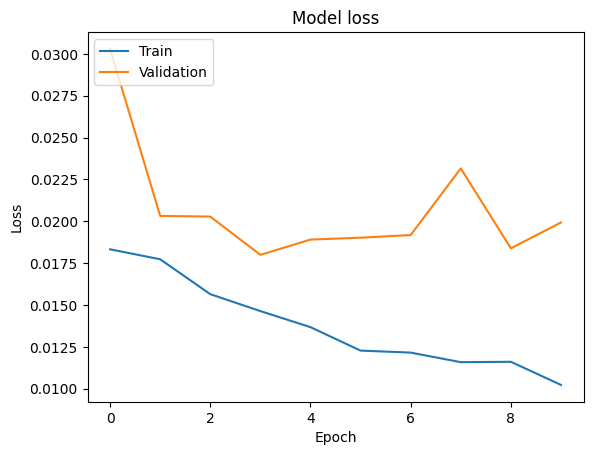

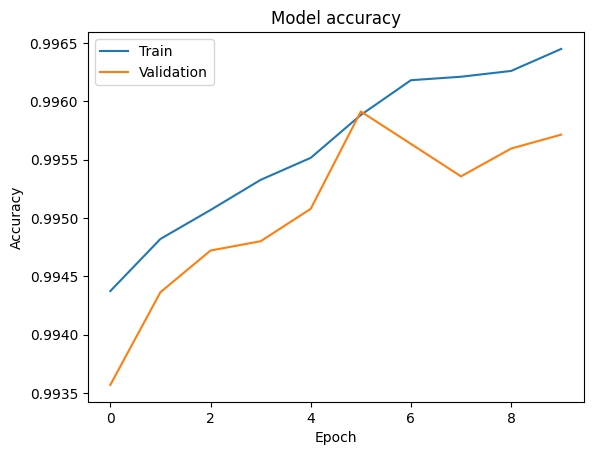

In [ ]:
import matplotlib.pyplot as plt
s
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
